<a href="https://colab.research.google.com/github/aishwarya071/aishwarya071.github.io/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for splitting the data into train and test
from sklearn.model_selection import train_test_split
#for model evaluation
from sklearn.metrics import accuracy_score
data = pd.read_csv(r"/content/heartprediction.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


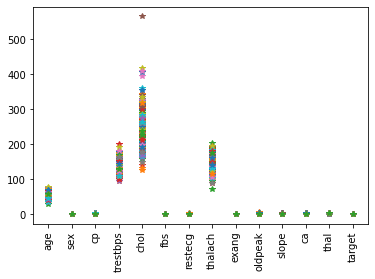

In [71]:
plt.plot(data.T,'*')
plt.xticks(rotation=90)
plt.show()

In [66]:
Y = data['target']
X = data.drop(['target'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3,stratify=Y)

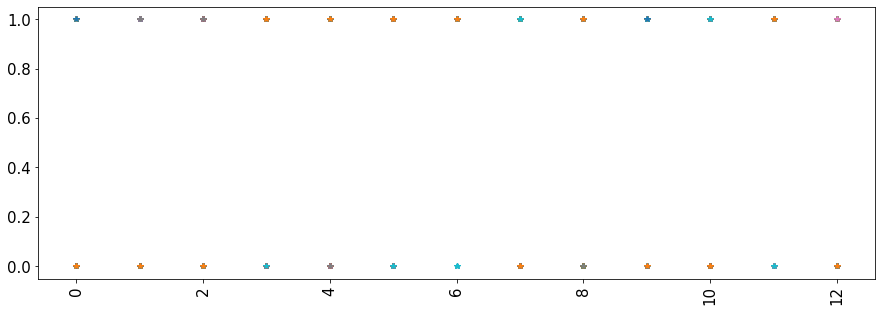

In [74]:
x_train_binarized = X_train.apply(pd.cut,bins = 2 ,labels = [1,0]).values
x_test_binarized = X_test.apply(pd.cut,bins=2,labels =[1,0]).values
 
#plotting the data
plt.figure(figsize=(15,5))
plt.plot(x_train_binarized.T,'*')
plt.xticks(rotation='vertical',c='black',size=15)
plt.yticks(c='black',size=15)
plt.show()

In [80]:
class MP_Neuron:
  #intializing the parameter value to 0
  def __init__(self):
    self.b = 0
  #defining the model
  def Model(self,x):
    return np.sum(x)>=self.b
  #optimising algorithm
  def fit(self,x,y):
    #for storing accuracies for differnt value of b
    accuracy = {}
    #since the range of b is from [0,n]
    for b in range(x.shape[1] + 1):
      self.b = b
      yhat = []
      for row in x:
          yhat.append(self.Model(row)) 
      accuracy[b] = accuracy_score(yhat,y)
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b
    return [accuracy,best_b,accuracy[best_b]]
  def predict(self,x,y):
    yhat = []
    for row in x:
      yhat.append(self.Model(row))
    accuracy = accuracy_score(y,yhat)
    return accuracy


In [79]:
neuron = MP_Neuron()
accuracy, best_b, accuracy_model = neuron.fit(x_train_binarized,Y_train)
print("The optimal value of b :",best_b)
print("accuracy_model on training data :",accuracy_model*100)

The optimal value of b : 6
accuracy_model on training data : 55.78512396694215


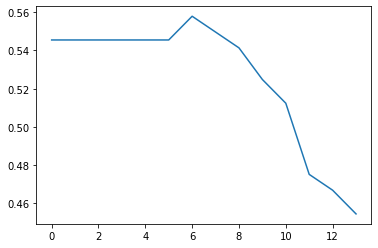

In [82]:
accuracies = list(accuracy.values())
plt.plot(accuracies)
plt.xticks(c='black')
plt.yticks(c='black')
plt.show()

In [83]:
accuracy = neuron.predict(x_test_binarized,Y_test)
print("The accuracy of model on test data is :",accuracy*100)

The accuracy of model on test data is : 52.459016393442624
